In [1]:
import numpy
b = numpy.load('results_yacht_M_5_S_50_i_1.npz')
print(b.files)


['lpd_pogpe_mcmc_train', 'lpd_pogpe_mcmc_test', 'mse_pogpe_mcmc_train', 'mse_pogpe_mcmc_test', 'lpd_pogpe_svi_train', 'lpd_pogpe_svi_test', 'mse_pogpe_svi_train', 'mse_pogpe_svi_test', 'ymu_tst_mcmc', 'ymu_tst_svi', 'y_test']


In [2]:
print("MLPD (mcmc) train and test: ", b['lpd_pogpe_mcmc_train'], b['lpd_pogpe_mcmc_test'])
print("MLPD (svi) train and test: ", b['lpd_pogpe_svi_train'], b['lpd_pogpe_svi_test'])


MLPD (mcmc) train and test:  2.2350859258962825 1.808882076056867
MLPD (svi) train and test:  2.2048465895050744 1.782188631604437


In [3]:
print("MSE (mcmc) train and test: ", b['mse_pogpe_mcmc_train'], b['mse_pogpe_mcmc_test'])
print("MSE(svi) train and test: ", b['mse_pogpe_svi_train'], b['mse_pogpe_svi_test'])


MSE (mcmc) train and test:  0.005248249526747318 0.011424231995366584
MSE(svi) train and test:  0.0050684295256216705 0.011431293134998528


In [4]:
y_test = b["y_test"]
ymu_tst_svi = b["ymu_tst_svi"]
ymu_tst_mcmc = b["ymu_tst_mcmc"]


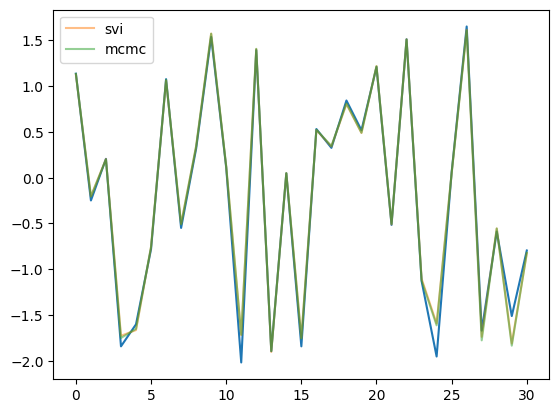

In [5]:
import matplotlib.pyplot as plt
plt.plot(range(y_test.shape[0]), y_test)
plt.plot(range(y_test.shape[0]), ymu_tst_svi, label = "svi", alpha=0.5)
plt.plot(range(y_test.shape[0]), ymu_tst_mcmc, label = "mcmc", alpha=0.5)
plt.legend()

In [6]:
c = numpy.load('results_single_gp_yacht_i_1.npz')


In [7]:
print("single gp MLPD (test): ", c["single_gp_test_lpd"])
print("single gp MLPD (train): ", c["single_gp_train_lpd"])
print("single gp MSE (test): ", c["single_gp_test_mse"])
print("single gp MSE (train): ", c["single_gp_train_mse"])

single gp MLPD (test):  0.5609151932634466
single gp MLPD (train):  2.1631345049846376
single gp MSE (test):  0.011602494622730943
single gp MSE (train):  0.0005390709613165201


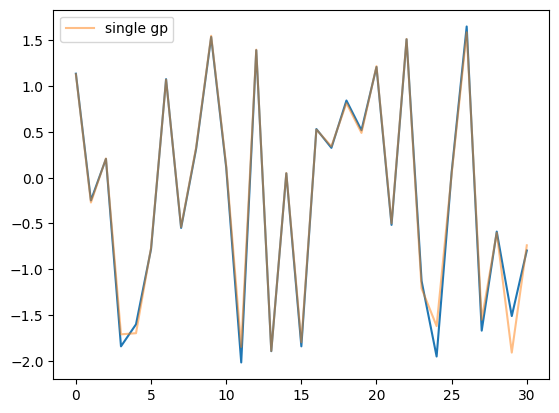

In [8]:
plt.plot(range(y_test.shape[0]), y_test)
plt.plot(range(y_test.shape[0]), c["ymu_single_gp"], label = "single gp", alpha=0.5)
plt.legend()

## Results of M=2 experts and S=50 spectral frequencies

In [9]:
import numpy as np

results_nlpd_pogpe_train = np.empty((2,10))  # results of mcmc and map (svi)
results_nlpd_single_gp_train = np.empty((1,10))

results_nlpd_pogpe_test = np.empty((2,10))  # results of mcmc and map (svi)
results_nlpd_single_gp_test = np.empty((1,10))

results_mse_pogpe_train = np.empty((2,10))
results_mse_single_gp_train = np.empty((1,10))

results_mse_pogpe_test = np.empty((2,10))
results_mse_single_gp_test = np.empty((1,10))


for i_seed in range(10):

    aux1 = np.load(f'results_yacht_M_2_S_50_i_{i_seed}.npz')
    aux2 = np.load(f'results_single_gp_yacht_i_{i_seed}.npz')
    
    results_nlpd_pogpe_train[0,i_seed] = -aux1['lpd_pogpe_mcmc_train']   # first row is for mcmc results
    results_nlpd_pogpe_test[0,i_seed] = -aux1['lpd_pogpe_mcmc_test']

    results_nlpd_pogpe_train[1,i_seed] = -aux1['lpd_pogpe_svi_train']   # second row is for map (svi) results
    results_nlpd_pogpe_test[1,i_seed] = -aux1['lpd_pogpe_svi_test']

    results_mse_pogpe_train[0,i_seed] = aux1['mse_pogpe_mcmc_train']  # first row is for mcmc results
    results_mse_pogpe_test[0,i_seed] = aux1['mse_pogpe_mcmc_test']

    results_mse_pogpe_train[1,i_seed] = aux1['mse_pogpe_svi_train']  # second row is for map (svi) results
    results_mse_pogpe_test[1,i_seed] = aux1['mse_pogpe_svi_test']

    results_nlpd_single_gp_train[0,i_seed] = -aux2['single_gp_train_lpd']
    results_nlpd_single_gp_test[0,i_seed] = -aux2['single_gp_test_lpd']

    results_mse_single_gp_train[0,i_seed] = aux2['single_gp_train_mse']
    results_mse_single_gp_test[0,i_seed] = aux2['single_gp_test_mse']


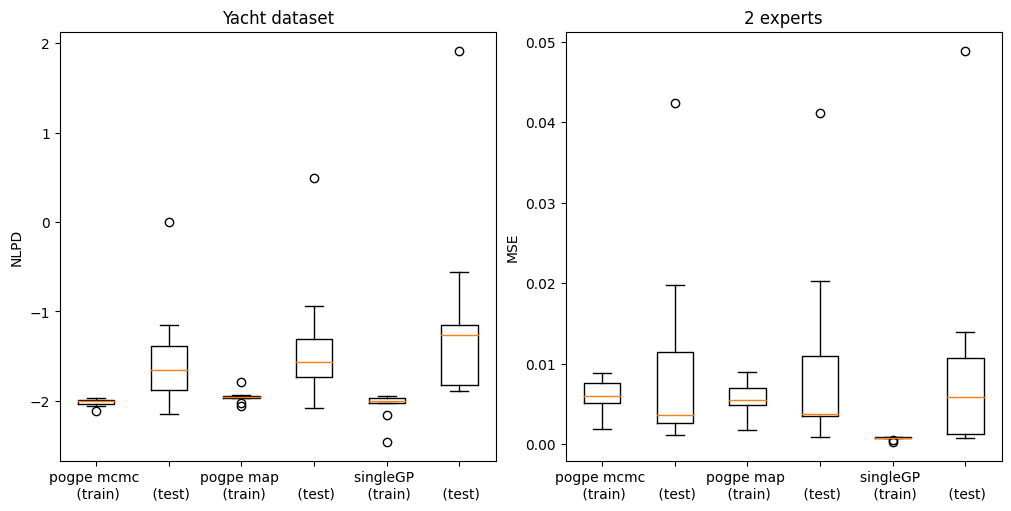

In [10]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
data_1 = results_nlpd_pogpe_train[0,:].squeeze()
data_2 = results_nlpd_pogpe_test[0,:].squeeze()

data_3 = results_nlpd_pogpe_train[1,:].squeeze()
data_4 = results_nlpd_pogpe_test[1,:].squeeze()

data_5 = results_nlpd_single_gp_train.squeeze()
data_6 = results_nlpd_single_gp_test.squeeze()

data = [data_1, data_2, data_3, data_4, data_5, data_6]
 
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5), constrained_layout=True)
 

# Creating plot
bp = ax[0].boxplot(data)

ax[0].set_xticks([1,2,3,4,5,6])
ax[0].set_xticklabels(["pogpe mcmc \n (train)",
                    " \n (test)",
                    'pogpe map \n (train)',
                    ' \n (test)',
                    'singleGP \n (train)',
                    ' \n (test)'
                    ]
                    )
ax[0].set_ylabel('NLPD')
ax[0].set_title("Yacht dataset")
 
data_1 = results_mse_pogpe_train[0,:].squeeze()
data_2 = results_mse_pogpe_test[0,:].squeeze()

data_3 = results_mse_pogpe_train[1,:].squeeze()
data_4 = results_mse_pogpe_test[1,:].squeeze()

data_5 = results_mse_single_gp_train.squeeze()
data_6 = results_mse_single_gp_test.squeeze()

data = [data_1, data_2, data_3, data_4, data_5, data_6]
 

 

bp = ax[1].boxplot(data)

ax[1].set_xticks([1,2,3,4,5,6])
ax[1].set_xticklabels(["pogpe mcmc \n (train)",
                    " \n (test)",
                    'pogpe map \n (train)',
                    ' \n (test)',
                    'singleGP \n (train)',
                    ' \n (test)'
                    ]
                    )
ax[1].set_ylabel('MSE')
ax[1].set_title("2 experts");
 
# # show plot
# plt.show()


## Results S=50 spectral frequencies and M=2,4,6,8,10 experts

In [11]:
import numpy as np

results_nlpd_pogpe_train = np.empty((5,10,2))  # num_exp x num_seeds x type_inference
results_nlpd_pogpe_test = np.empty((5,10,2))  


results_mse_pogpe_train = np.empty((5,10,2))
results_mse_pogpe_test = np.empty((5,10,2))


for i_m,m in enumerate(np.arange(2,11,2)):
    for i_seed in range(10):
        
        aux = np.load(f'results_yacht_M_{m}_S_50_i_{i_seed}.npz')  

        for i_inf, type_inf in enumerate(["mcmc", "svi"]): 

            results_nlpd_pogpe_train[i_m,i_seed,i_inf] = -aux[f'lpd_pogpe_{type_inf}_train']   # first row is for mcmc results
            results_nlpd_pogpe_test[i_m,i_seed,i_inf] = -aux[f'lpd_pogpe_{type_inf}_test']

            results_mse_pogpe_train[i_m,i_seed,i_inf] = aux[f'mse_pogpe_{type_inf}_train']  # first row is for mcmc results
            results_mse_pogpe_test[i_m,i_seed,i_inf] = aux[f'mse_pogpe_{type_inf}_test']




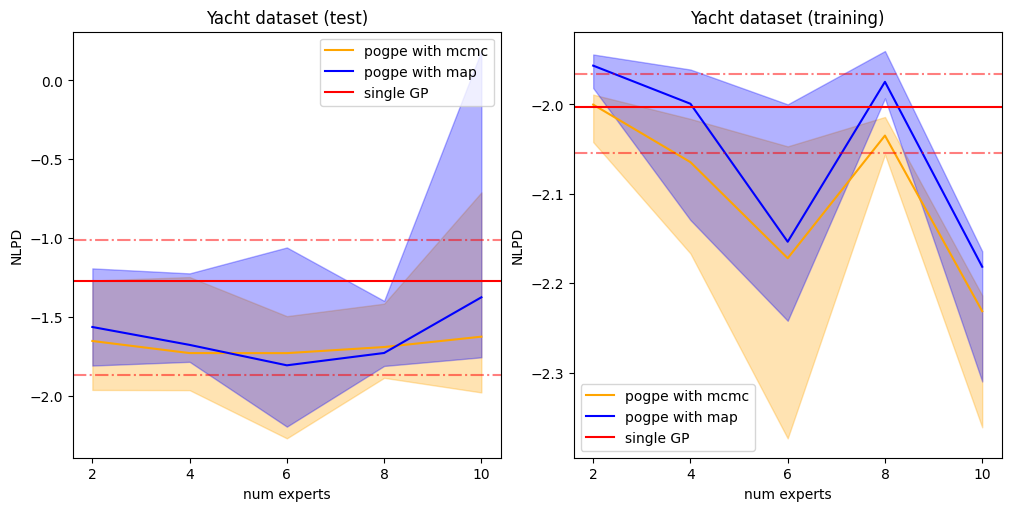

In [12]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
data_mcmc = np.empty(shape=(10,5))
data_map = np.empty(shape=(10,5))
# RESULTS ON TEST DATA
for i in range(5):
    data_mcmc[:,i] = results_nlpd_pogpe_test[i,:,0]
    data_map[:,i] = results_nlpd_pogpe_test[i,:,1]
 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5), constrained_layout=True)
 
#
# Creating plot
ax[0].plot(np.arange(2,11,2), np.median(data_mcmc,axis=0), label = "pogpe with mcmc",color="orange")
ax[0].fill_between(np.arange(2,11,2),np.quantile(data_mcmc,q=0.8,axis=0),
                   np.quantile(data_mcmc,q=0.2,axis=0),color="orange",alpha=0.3)
ax[0].plot(np.arange(2,11,2), np.median(data_map,axis=0), label = "pogpe with map", color="blue")
ax[0].fill_between(np.arange(2,11,2),np.quantile(data_map,q=0.8,axis=0),
                   np.quantile(data_map,q=0.2,axis=0),color="blue",alpha=0.3)

ax[0].axhline(y=np.median(results_nlpd_single_gp_test.squeeze()), color='r', linestyle='-',label = "single GP")
ax[0].axhline(y=np.quantile(results_nlpd_single_gp_test.squeeze(),q=0.8), color='r', linestyle='-.',alpha=0.5)
ax[0].axhline(y=np.quantile(results_nlpd_single_gp_test.squeeze(),q=0.2), color='r', linestyle='-.',alpha=0.5)


ax[0].set_xticks(np.arange(2,11,2))
ax[0].set_xlabel('num experts')
ax[0].set_ylabel('NLPD')
ax[0].set_title("Yacht dataset (test)")
ax[0].legend()

# RESULTS ON TRAINING DATA
for i in range(5):
    data_mcmc[:,i] = results_nlpd_pogpe_train[i,:,0]
    data_map[:,i] = results_nlpd_pogpe_train[i,:,1]
 
 
#
# Creating plot
ax[1].plot(np.arange(2,11,2), np.median(data_mcmc,axis=0), label = "pogpe with mcmc",color="orange")
ax[1].fill_between(np.arange(2,11,2),np.quantile(data_mcmc,q=0.8,axis=0),
                   np.quantile(data_mcmc,q=0.2,axis=0),color="orange",alpha=0.3)
ax[1].plot(np.arange(2,11,2), np.median(data_map,axis=0), label = "pogpe with map", color="blue")
ax[1].fill_between(np.arange(2,11,2),np.quantile(data_map,q=0.8,axis=0),
                   np.quantile(data_map,q=0.2,axis=0),color="blue",alpha=0.3)

ax[1].axhline(y=np.median(results_nlpd_single_gp_train.squeeze()), color='r', linestyle='-',label = "single GP")
ax[1].axhline(y=np.quantile(results_nlpd_single_gp_train.squeeze(),q=0.8), color='r', linestyle='-.',alpha=0.5)
ax[1].axhline(y=np.quantile(results_nlpd_single_gp_train.squeeze(),q=0.2), color='r', linestyle='-.',alpha=0.5)

ax[1].set_xticks(np.arange(2,11,2))
ax[1].set_xlabel('num experts')
ax[1].set_ylabel('NLPD')
ax[1].set_title("Yacht dataset (training)")

ax[1].legend();

 
# show plot
# plt.show()



Above are median and 0.8 and 0.2 quantiles of NLPD (lower is better) on test and training data

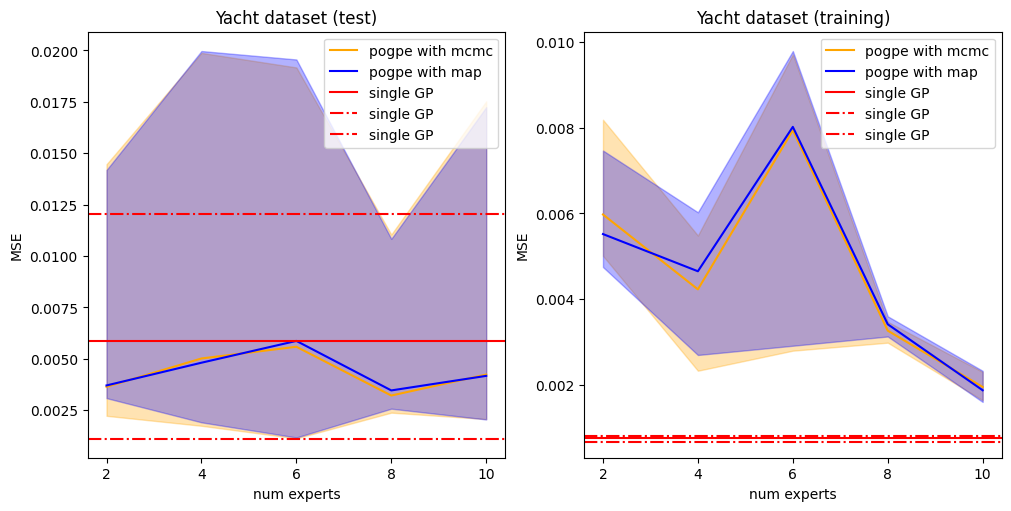

In [13]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 

# RESULTS ON TEST DATA
data_mcmc = np.empty((10,5))
data_map = np.empty((10,5))
for i in range(5):
    data_mcmc[:,i] = results_mse_pogpe_test[i,:,0]
    data_map[:,i] = results_mse_pogpe_test[i,:,1]
 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5), constrained_layout=True)
 
#
# Creating plot
ax[0].plot(np.arange(2,11,2), np.median(data_mcmc,axis=0), label = "pogpe with mcmc",color="orange")
ax[0].fill_between(np.arange(2,11,2),np.quantile(data_mcmc,q=0.8,axis=0),
                   np.quantile(data_mcmc,q=0.2,axis=0),color="orange",alpha=0.3)
ax[0].plot(np.arange(2,11,2), np.median(data_map,axis=0), label = "pogpe with map", color="blue")
ax[0].fill_between(np.arange(2,11,2),np.quantile(data_map,q=0.8,axis=0),
                   np.quantile(data_map,q=0.2,axis=0),color="blue",alpha=0.3)

ax[0].axhline(y=np.median(results_mse_single_gp_test.squeeze()), color='r', linestyle='-',label = "single GP")
ax[0].axhline(y=np.quantile(results_mse_single_gp_test.squeeze(),q=0.8), color='r', linestyle='-.',label = "single GP")
ax[0].axhline(y=np.quantile(results_mse_single_gp_test.squeeze(),q=0.2), color='r', linestyle='-.',label = "single GP")

ax[0].set_xticks(np.arange(2,11,2))
ax[0].set_xlabel('num experts')
ax[0].set_ylabel('MSE')
ax[0].set_title("Yacht dataset (test)")
ax[0].legend()

# RESULTS ON TRAINING DATA
for i in range(5):
    data_mcmc[:,i] = results_mse_pogpe_train[i,:,0]
    data_map[:,i] = results_mse_pogpe_train[i,:,1]
 
#
# Creating plot
ax[1].plot(np.arange(2,11,2), np.median(data_mcmc,axis=0), label = "pogpe with mcmc",color="orange")
ax[1].fill_between(np.arange(2,11,2),np.quantile(data_mcmc,q=0.8,axis=0),
                   np.quantile(data_mcmc,q=0.2,axis=0),color="orange",alpha=0.3)
ax[1].plot(np.arange(2,11,2), np.median(data_map,axis=0), label = "pogpe with map", color="blue")
ax[1].fill_between(np.arange(2,11,2),np.quantile(data_map,q=0.8,axis=0),
                   np.quantile(data_map,q=0.2,axis=0),color="blue",alpha=0.3)

ax[1].axhline(y=np.median(results_mse_single_gp_train.squeeze()), color='r', linestyle='-',label = "single GP")
ax[1].axhline(y=np.quantile(results_mse_single_gp_train.squeeze(),q=0.8), color='r', linestyle='-.',label = "single GP")
ax[1].axhline(y=np.quantile(results_mse_single_gp_train.squeeze(),q=0.2), color='r', linestyle='-.',label = "single GP")


ax[1].set_xticks(np.arange(2,11,2))
ax[1].set_xlabel('num experts')
ax[1].set_ylabel('MSE')
ax[1].set_title("Yacht dataset (training)")
ax[1].legend();

 
# show plot
# plt.show()



Above are median and 0.8 and 0.2 quantiles of MSE (lower is better) on test and training data

## Results M = 4 experts and S = 50, 100, 150, 200, 300 spectral frequencies

In [14]:
import numpy as np

results_nlpd_pogpe_train = np.empty((5,10,2))  # num_exp x num_seeds x type_inference
results_nlpd_pogpe_test = np.empty((5,10,2))  


results_mse_pogpe_train = np.empty((5,10,2))
results_mse_pogpe_test = np.empty((5,10,2))


for i_s,S in enumerate([50, 100, 150, 200, 300]):
    for i_seed in range(10):
        
        aux = np.load(f'results_yacht_M_4_S_{S}_i_{i_seed}.npz')  

        for i_inf, type_inf in enumerate(["mcmc", "svi"]): 

            results_nlpd_pogpe_train[i_s,i_seed,i_inf] = -aux[f'lpd_pogpe_{type_inf}_train']   # first row is for mcmc results
            results_nlpd_pogpe_test[i_s,i_seed,i_inf] = -aux[f'lpd_pogpe_{type_inf}_test']

            results_mse_pogpe_train[i_s,i_seed,i_inf] = aux[f'mse_pogpe_{type_inf}_train']  # first row is for mcmc results
            results_mse_pogpe_test[i_s,i_seed,i_inf] = aux[f'mse_pogpe_{type_inf}_test']




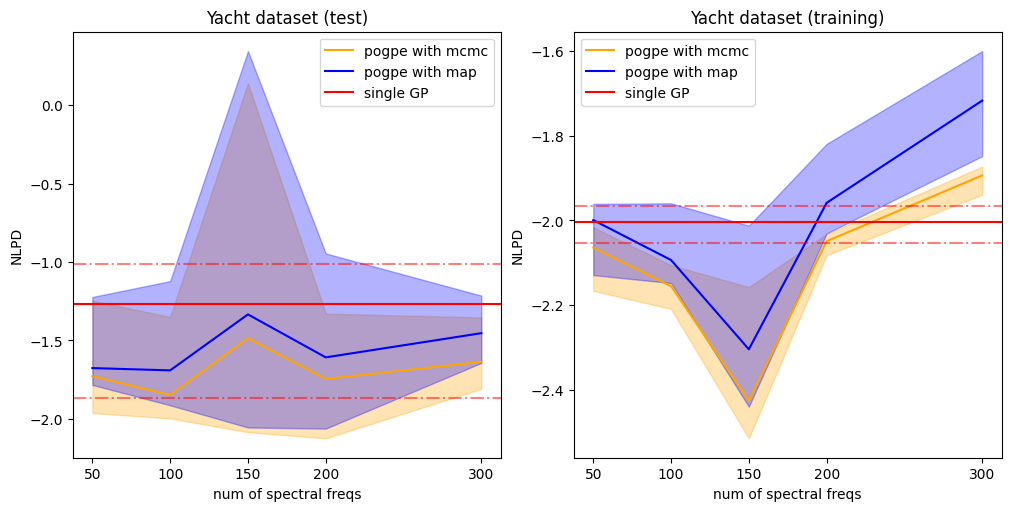

In [15]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
data_mcmc = np.empty(shape=(10,5))
data_map = np.empty(shape=(10,5))
# RESULTS ON TEST DATA
for i in range(5):
    data_mcmc[:,i] = results_nlpd_pogpe_test[i,:,0]
    data_map[:,i] = results_nlpd_pogpe_test[i,:,1]
 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5), constrained_layout=True)
 
#
# Creating plot
ax[0].plot([50,100,150,200,300], np.median(data_mcmc,axis=0), label = "pogpe with mcmc",color="orange")
ax[0].fill_between([50,100,150,200,300],np.quantile(data_mcmc,q=0.8,axis=0),
                   np.quantile(data_mcmc,q=0.2,axis=0),color="orange",alpha=0.3)
ax[0].plot([50,100,150,200,300], np.median(data_map,axis=0), label = "pogpe with map", color="blue")
ax[0].fill_between([50,100,150,200,300],np.quantile(data_map,q=0.8,axis=0),
                   np.quantile(data_map,q=0.2,axis=0),color="blue",alpha=0.3)

ax[0].axhline(y=np.median(results_nlpd_single_gp_test.squeeze()), color='r', linestyle='-',label = "single GP")
ax[0].axhline(y=np.quantile(results_nlpd_single_gp_test.squeeze(),q=0.8), color='r', linestyle='-.',alpha=0.5)
ax[0].axhline(y=np.quantile(results_nlpd_single_gp_test.squeeze(),q=0.2), color='r', linestyle='-.',alpha=0.5)


ax[0].set_xticks([50,100,150,200,300])
ax[0].set_xlabel('num of spectral freqs')
ax[0].set_ylabel('NLPD')
ax[0].set_title("Yacht dataset (test)")
ax[0].legend()

# RESULTS ON TRAINING DATA
for i in range(5):
    data_mcmc[:,i] = results_nlpd_pogpe_train[i,:,0]
    data_map[:,i] = results_nlpd_pogpe_train[i,:,1]
 
 
#
# Creating plot
ax[1].plot([50,100,150,200,300], np.median(data_mcmc,axis=0), label = "pogpe with mcmc",color="orange")
ax[1].fill_between([50,100,150,200,300],np.quantile(data_mcmc,q=0.8,axis=0),
                   np.quantile(data_mcmc,q=0.2,axis=0),color="orange",alpha=0.3)
ax[1].plot([50,100,150,200,300], np.median(data_map,axis=0), label = "pogpe with map", color="blue")
ax[1].fill_between([50,100,150,200,300],np.quantile(data_map,q=0.8,axis=0),
                   np.quantile(data_map,q=0.2,axis=0),color="blue",alpha=0.3)

ax[1].axhline(y=np.median(results_nlpd_single_gp_train.squeeze()), color='r', linestyle='-',label = "single GP")
ax[1].axhline(y=np.quantile(results_nlpd_single_gp_train.squeeze(),q=0.8), color='r', linestyle='-.',alpha=0.5)
ax[1].axhline(y=np.quantile(results_nlpd_single_gp_train.squeeze(),q=0.2), color='r', linestyle='-.',alpha=0.5)

ax[1].set_xticks([50,100,150,200,300])
ax[1].set_xlabel('num of spectral freqs')
ax[1].set_ylabel('NLPD')
ax[1].set_title("Yacht dataset (training)")

ax[1].legend()

 
# show plot
# plt.show()



Above are median and 0.8 and 0.2 quantiles of NLPD (lower is better) on test and training data

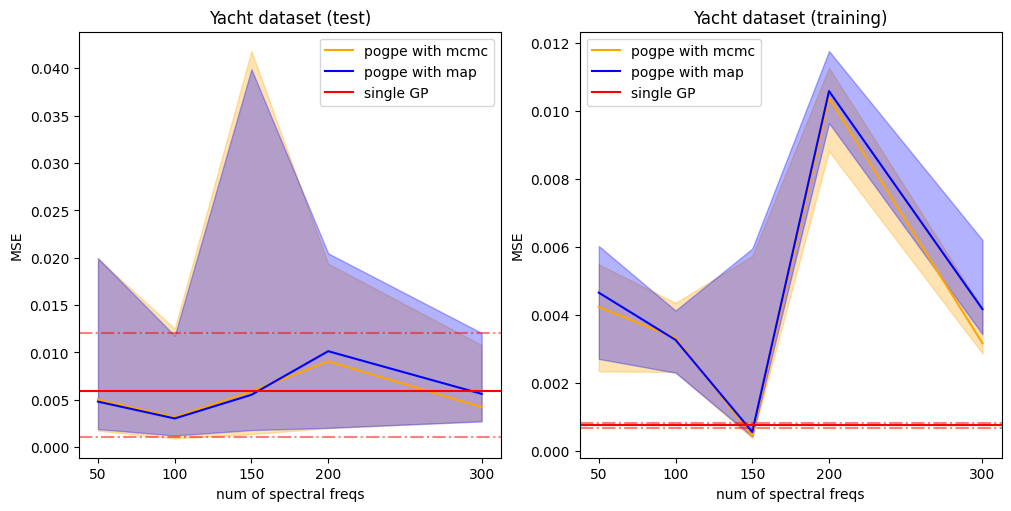

In [16]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
data_mcmc = np.empty(shape=(10,5))
data_map = np.empty(shape=(10,5))
# RESULTS ON TEST DATA
for i in range(5):
    data_mcmc[:,i] = results_mse_pogpe_test[i,:,0]
    data_map[:,i] = results_mse_pogpe_test[i,:,1]
 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5), constrained_layout=True)
 
#
# Creating plot
ax[0].plot([50,100,150,200,300], np.median(data_mcmc,axis=0), label = "pogpe with mcmc",color="orange")
ax[0].fill_between([50,100,150,200,300],np.quantile(data_mcmc,q=0.8,axis=0),
                   np.quantile(data_mcmc,q=0.2,axis=0),color="orange",alpha=0.3)
ax[0].plot([50,100,150,200,300], np.median(data_map,axis=0), label = "pogpe with map", color="blue")
ax[0].fill_between([50,100,150,200,300],np.quantile(data_map,q=0.8,axis=0),
                   np.quantile(data_map,q=0.2,axis=0),color="blue",alpha=0.3)

ax[0].axhline(y=np.median(results_mse_single_gp_test.squeeze()), color='r', linestyle='-',label = "single GP")
ax[0].axhline(y=np.quantile(results_mse_single_gp_test.squeeze(),q=0.8), color='r', linestyle='-.',alpha=0.5)
ax[0].axhline(y=np.quantile(results_mse_single_gp_test.squeeze(),q=0.2), color='r', linestyle='-.',alpha=0.5)


ax[0].set_xticks([50,100,150,200,300])
ax[0].set_xlabel('num of spectral freqs')
ax[0].set_ylabel('MSE')
ax[0].set_title("Yacht dataset (test)")
ax[0].legend()

# RESULTS ON TRAINING DATA
for i in range(5):
    data_mcmc[:,i] = results_mse_pogpe_train[i,:,0]
    data_map[:,i] = results_mse_pogpe_train[i,:,1]
 
 
#
# Creating plot
ax[1].plot([50,100,150,200,300], np.median(data_mcmc,axis=0), label = "pogpe with mcmc",color="orange")
ax[1].fill_between([50,100,150,200,300],np.quantile(data_mcmc,q=0.8,axis=0),
                   np.quantile(data_mcmc,q=0.2,axis=0),color="orange",alpha=0.3)
ax[1].plot([50,100,150,200,300], np.median(data_map,axis=0), label = "pogpe with map", color="blue")
ax[1].fill_between([50,100,150,200,300],np.quantile(data_map,q=0.8,axis=0),
                   np.quantile(data_map,q=0.2,axis=0),color="blue",alpha=0.3)

ax[1].axhline(y=np.median(results_mse_single_gp_train.squeeze()), color='r', linestyle='-',label = "single GP")
ax[1].axhline(y=np.quantile(results_mse_single_gp_train.squeeze(),q=0.8), color='r', linestyle='-.',alpha=0.5)
ax[1].axhline(y=np.quantile(results_mse_single_gp_train.squeeze(),q=0.2), color='r', linestyle='-.',alpha=0.5)

ax[1].set_xticks([50,100,150,200,300])
ax[1].set_xlabel('num of spectral freqs')
ax[1].set_ylabel('MSE')
ax[1].set_title("Yacht dataset (training)")

ax[1].legend()

 
# show plot
# plt.show()



Above are median and 0.8 and 0.2 quantiles of MSE (lower is better) on test and training data